### Loading and prerequesites

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [76]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_no_topic.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_no_topic.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_no_topic.pkl")

### Load dataset

In [77]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [78]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,62M8K311JBN9708D0000000,2021,Transgourmet Der Grosshändler Transgourmet üb...,neutral,0.0,5.0,1.0,6.0
1,64VD9161JBN970430000000,2022,Leider wird bei solchen nachhaltigen Ernährung...,neutral,0.0,7.0,1.0,8.0
2,61FC83N1F0CCR19C0000000,2020,Brüssel (awp/sda/dpa) - Hanfprodukte mit Canna...,neutral,2.0,20.0,5.0,27.0
3,62MC3G61F0CCR4C20000000,2021,"Zürich (awp/sda/awp) - Freitag, 7. Mai 2021 ME...",neutral,3.0,76.0,1.0,80.0
4,64JYT131F0CCR3520000000,2022,Zürich (awp) - Die Coop-Tochter Transgourmet I...,neutral,0.0,5.0,0.0,5.0


### General overview

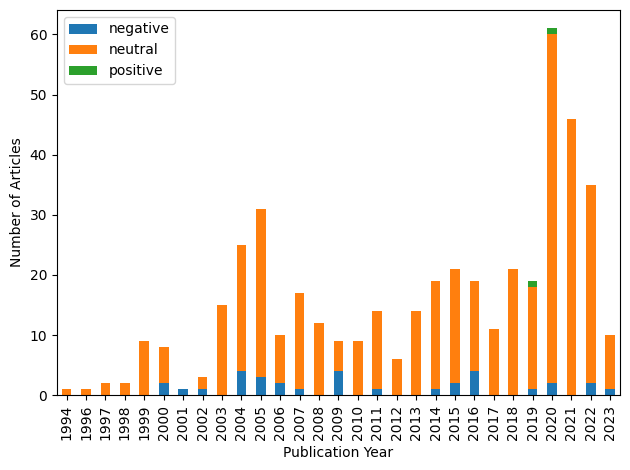

In [79]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_no_topic_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.033
Model:                                  OLS   Adj. R-squared:                 -0.003
Method:                       Least Squares   F-statistic:                    0.9161
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.347
Time:                              09:54:04   Log-Likelihood:                 5.8671
No. Observations:                        29   AIC:                            -7.734
Df Residuals:                            27   BIC:                            -5.000
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

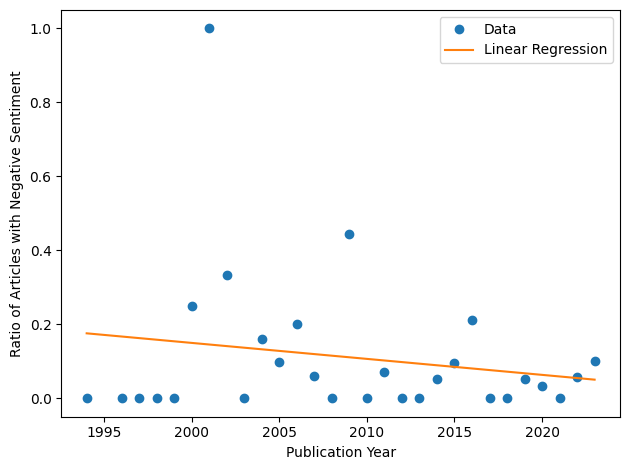

In [80]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_no_topic_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.085
Model:                                  OLS   Adj. R-squared:                  0.051
Method:                       Least Squares   F-statistic:                     2.506
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.125
Time:                              09:54:04   Log-Likelihood:                 93.816
No. Observations:                        29   AIC:                            -183.6
Df Residuals:                            27   BIC:                            -180.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

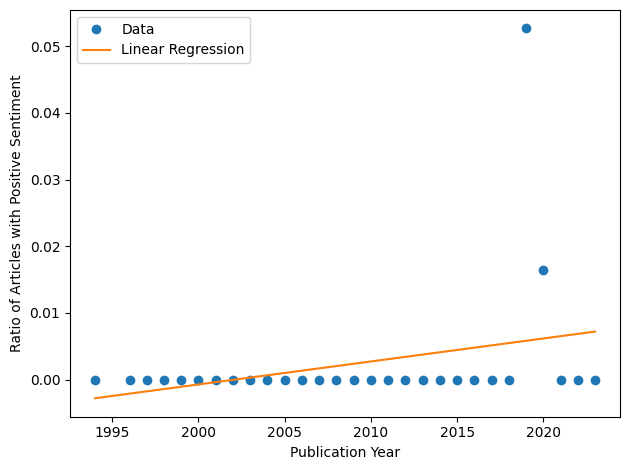

In [81]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_no_topic_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.028
Model:                                 OLS   Adj. R-squared:                 -0.008
Method:                      Least Squares   F-statistic:                    0.7758
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.386
Time:                             09:54:04   Log-Likelihood:                 5.8663
No. Observations:                       29   AIC:                            -7.733
Df Residuals:                           27   BIC:                            -4.998
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

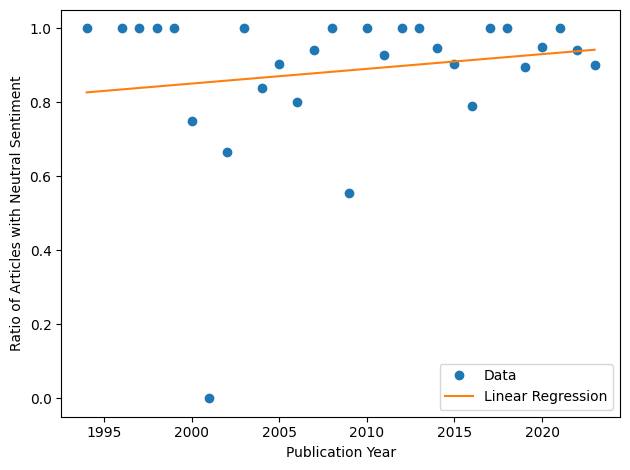

In [82]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_no_topic_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [83]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
87,61FS4M51DY2BS22Y0000000,2020,"Es ist eine Weile her, dass sich alte Ideen vo...",positive,2.0,49.0,5.0,56.0
310,5VG33HV1F04J31GX0000000,2019,Die Vier gehen mit ganz unterschiedlichen Moti...,positive,1.0,21.0,1.0,23.0


### Further analysis of negative articles

In [84]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
8,5Y0NS431DY2BS32W0000000,2020,"Nichts geliefert, nichts gesagt Im August habe...",negative,2.0,15.0,6.0,23.0
12,4NY9MRJ0TWX2722K0000000,2007,Die Mehrheit der Deutschen will kein Gen-Food....,negative,1.0,2.0,1.0,4.0
20,4GB4FXR0TWX2824H0000000,2004,Politiker machen es den Wählern manchmal wirkl...,negative,1.0,51.0,7.0,59.0
22,4H4YMN00TWX282T10000000,2005,"Frau Göring-Eckardt, was wollen Sie mit ihrem ...",negative,3.0,31.0,7.0,41.0
24,52763DJ1JC3NY1080000000,2011,Zum Abschluss der Reihe Kulinarisches Kino gab...,negative,0.0,10.0,0.0,10.0
26,5WG76PK1JC3P00CR0000000,2019,Markus Schneider Der Kehlgesang der kanadische...,negative,3.0,25.0,6.0,34.0
39,64TVF291DY2BS0VP0000000,2022,"""NZZ am Sonntag""/""SonntagsZeitung"": In der Cor...",negative,3.0,69.0,0.0,72.0
41,67H5KNP1JBKVT00B0000000,2023,"""In Deutschland war das Jahr 2022 in Bezug auf...",negative,0.0,15.0,1.0,16.0
62,7WRBVPW12RKCK5000000000,2009,Am Morgen danach hängen die grünen Luftballons...,negative,1.0,52.0,4.0,57.0
77,4G8WVG90TWCNF2F50000000,2005,"Beweise, daß es böse ist. Von Donna Leon. A. d...",negative,2.0,43.0,7.0,52.0


### Analysis per sentence

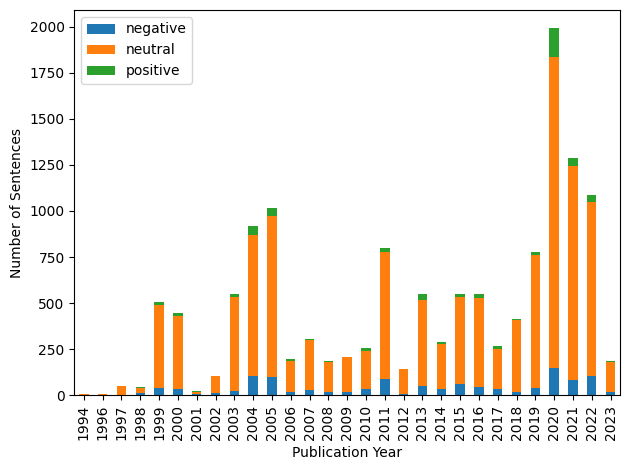

In [85]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_no_topic_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.200
Model:                                  OLS   Adj. R-squared:                  0.171
Method:                       Least Squares   F-statistic:                     6.768
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):             0.0149
Time:                              09:54:05   Log-Likelihood:                 45.032
No. Observations:                        29   AIC:                            -86.06
Df Residuals:                            27   BIC:                            -83.33
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

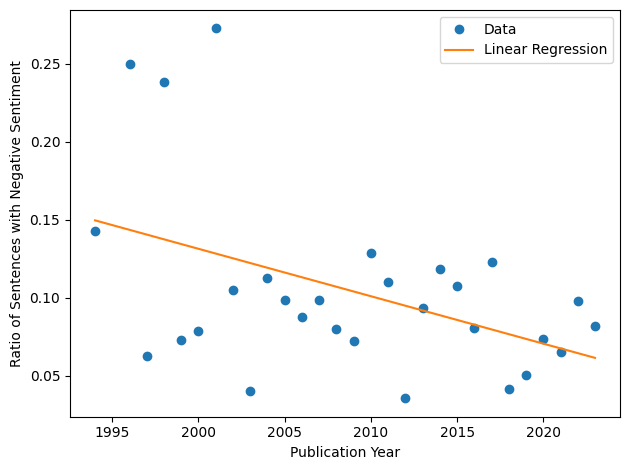

In [86]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_no_topic_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.083
Model:                                  OLS   Adj. R-squared:                  0.049
Method:                       Least Squares   F-statistic:                     2.431
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.131
Time:                              09:54:05   Log-Likelihood:                 70.939
No. Observations:                        29   AIC:                            -137.9
Df Residuals:                            27   BIC:                            -135.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

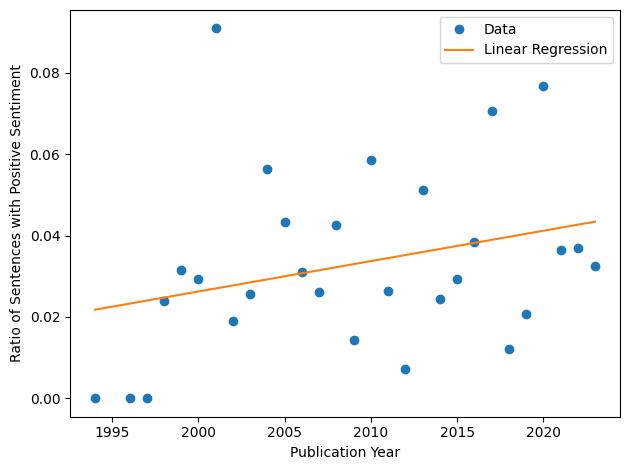

In [87]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_no_topic_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.087
Model:                                 OLS   Adj. R-squared:                  0.053
Method:                      Least Squares   F-statistic:                     2.565
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.121
Time:                             09:54:05   Log-Likelihood:                 39.121
No. Observations:                       29   AIC:                            -74.24
Df Residuals:                           27   BIC:                            -71.51
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

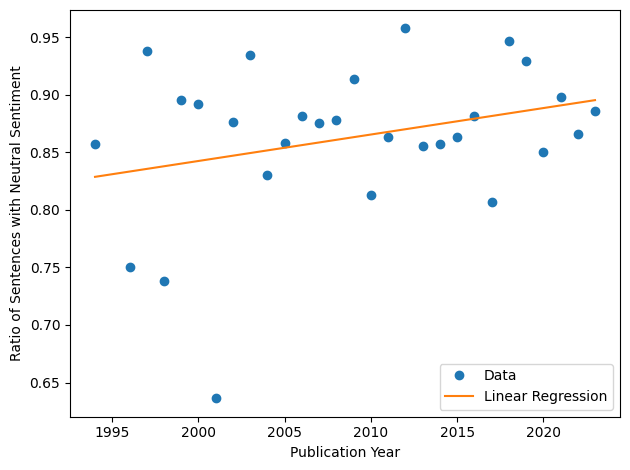

In [88]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_no_topic_sentences_ratio.png')
plt.show()

### Explore anomalies

In [89]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
47,53H2GCD1DYK710Y00000000,2011,Nymphomanische Kroatinnen soll es am Strand vo...,neutral,16.0,408.0,63.0,487.0
444,59XM35H1JDRK82420000000,2013,Sie gilt als eine der einflussreichsten Persön...,neutral,16.0,149.0,29.0,194.0
165,4BR2FX70TWH7K2480000000,2004,FILME BAD HOMBURG Kaskade / Panda Taunus-Therm...,neutral,11.0,61.0,23.0,95.0
337,60428DG1F07Y90MF0000000,2020,Die European Industrial Hemp Association (EIHA...,neutral,10.0,43.0,6.0,59.0
302,5YBJBY41DYBW50KV0000000,2020,Bruessel/Koeln (ots) - Der European Industrial...,neutral,10.0,43.0,5.0,58.0
370,5YBHCFJ1F086F1070000000,2020,- Die European Industrial Hemp Association (EI...,neutral,10.0,53.0,3.0,66.0
174,4GV25TW0TWH7K3450000000,2005,Vortrag über Gen-Food Offenbach · 26. Juni · o...,neutral,10.0,28.0,2.0,40.0
393,4CDG2GK0TWBKB20V0000000,2004,Stuttgart ist ein einziges Versprechen. Die Pa...,neutral,10.0,52.0,13.0,75.0
371,5YHDPP61F086F3WG0000000,2020,- Bundesamt für Verbraucherschutz und Lebensmi...,neutral,9.0,18.0,2.0,29.0
143,3X0BTDR0004YT4260000000,1999,europas adel verliert seinen Glanz. Entspreche...,neutral,9.0,235.0,17.0,261.0


In [90]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
47,53H2GCD1DYK710Y00000000,2011,Nymphomanische Kroatinnen soll es am Strand vo...,neutral,16.0,408.0,63.0,487.0
444,59XM35H1JDRK82420000000,2013,Sie gilt als eine der einflussreichsten Persön...,neutral,16.0,149.0,29.0,194.0
44,4GFC4PW0TWB9W2D30000000,2005,Die SPD und der Kanzler können einem fast leid...,neutral,7.0,31.0,26.0,64.0
165,4BR2FX70TWH7K2480000000,2004,FILME BAD HOMBURG Kaskade / Panda Taunus-Therm...,neutral,11.0,61.0,23.0,95.0
351,53D2H851JCR7S4CC0000000,2011,Hochdruckemulgieren - Neue Prozesse und Produk...,neutral,3.0,133.0,18.0,154.0
186,5PDVHVH1JBPW936C0000000,2017,"Herr Knop, Sie plädieren dafür, beim Essen auf...",neutral,3.0,54.0,18.0,75.0
409,640J7HK1JC81110M0000000,2021,Mit der dunklen Jahreszeit wächst bei vielen M...,neutral,1.0,66.0,17.0,84.0
143,3X0BTDR0004YT4260000000,1999,europas adel verliert seinen Glanz. Entspreche...,neutral,9.0,235.0,17.0,261.0
32,64WY9CD1JBK924G20000000,2022,Die US-Amerikaner reagieren damit auf eine gro...,neutral,3.0,51.0,16.0,70.0
422,5KKRJDS1JC3GN1N70000000,2016,Matthias Glarner hat seinen Sieg wahrlich verd...,negative,7.0,54.0,15.0,76.0
